In [1]:
# 1. 📦 Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Libraries erfolgreich importiert!")

Libraries erfolgreich importiert!


In [2]:
# 2. 📄 Load dataset
dataset_path = '/workspaces/bakery_sales_prediction/5_Datasets/bakery_training_dataset.csv'
print(f"Lade Datensatz von: {dataset_path}")

if os.path.exists(dataset_path):
    print("✅ Datei gefunden!")
    df = pd.read_csv(dataset_path)
    df['Datum'] = pd.to_datetime(df['Datum'])  # Convert date column
    print(f"Datensatz Shape: {df.shape}")
    print(f"Datum Range: {df['Datum'].min()} bis {df['Datum'].max()}")
else:
    raise FileNotFoundError(f"❌ Datei nicht gefunden: {dataset_path}")

Lade Datensatz von: /workspaces/bakery_sales_prediction/5_Datasets/bakery_training_dataset.csv
✅ Datei gefunden!
Datensatz Shape: (9334, 34)
Datum Range: 2013-07-01 00:00:00 bis 2018-07-31 00:00:00


In [3]:
# 3. 🧠 Feature Selection (same as Linear Regression)
feature_columns = [
    'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung',
    'Jahr', 'Monat', 'Tag', 'Wochentag_Nr',
    'Wettercode_fehlt', 'ist_feiertag',
    'Warengruppe_Brot', 'Warengruppe_Brötchen', 'Warengruppe_Croissant', 
    'Warengruppe_Konditorei', 'Warengruppe_Kuchen',
    'Jahreszeit_Winter', 'Jahreszeit_Sommer', 'Jahreszeit_Herbst',
    'Wochentag_Monday', 'Wochentag_Tuesday', 'Wochentag_Wednesday', 
    'Wochentag_Thursday', 'Wochentag_Friday', 'Wochentag_Saturday'
]

available_features = [col for col in feature_columns if col in df.columns]
X = df[available_features].copy()
y = df['Umsatz'].copy()

print(f"✅ Features verwendet: {available_features}")

✅ Features verwendet: ['Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Jahr', 'Monat', 'Tag', 'Wochentag_Nr', 'Wettercode_fehlt', 'ist_feiertag', 'Warengruppe_Brot', 'Warengruppe_Brötchen', 'Warengruppe_Croissant', 'Warengruppe_Konditorei', 'Warengruppe_Kuchen', 'Jahreszeit_Winter', 'Jahreszeit_Sommer', 'Jahreszeit_Herbst', 'Wochentag_Monday', 'Wochentag_Tuesday', 'Wochentag_Wednesday', 'Wochentag_Thursday', 'Wochentag_Friday', 'Wochentag_Saturday']


In [4]:
# 4. ⏱️ Zeitbasierter Split
train_mask = (df['Datum'] >= '2013-07-01') & (df['Datum'] <= '2017-07-31')
val_mask   = (df['Datum'] >= '2017-08-01') & (df['Datum'] <= '2018-07-31')

X_train, y_train = X.loc[train_mask], y.loc[train_mask]
X_val, y_val     = X.loc[val_mask], y.loc[val_mask]

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Validation samples: {X_val.shape[0]}")

✅ Training samples: 7493
✅ Validation samples: 1841


In [5]:
# 5. 🌲 Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
print("🔄 Training Random Forest...")
model.fit(X_train, y_train)
print("✅ Modell erfolgreich trainiert!")

🔄 Training Random Forest...
✅ Modell erfolgreich trainiert!


In [6]:
# 6. 📈 Evaluation on Validation Set
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("🌲 Random Forest Evaluation Results")
print(f"• MAE:   {mae:.2f}")
print(f"• RMSE:  {rmse:.2f}")
print(f"• R²:    {r2:.3f}")

🌲 Random Forest Evaluation Results
• MAE:   29.65
• RMSE:  41.92
• R²:    0.896


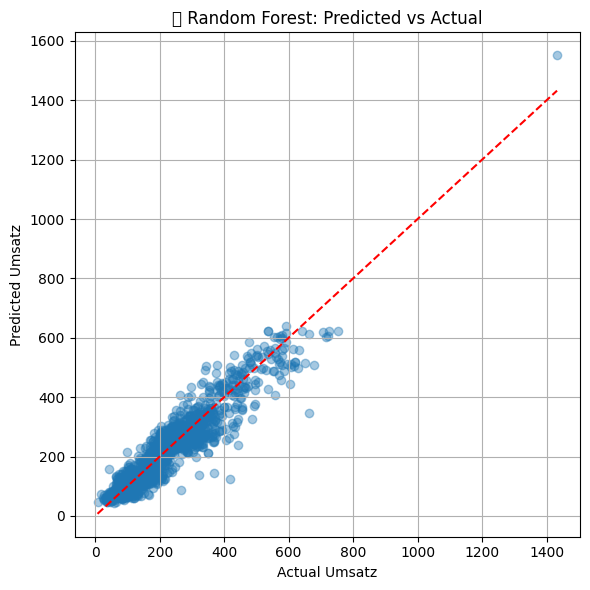

In [7]:
# 7. 📊 Plot: Predicted vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Umsatz")
plt.ylabel("Predicted Umsatz")
plt.title("🎯 Random Forest: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()